## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [62]:
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [63]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Пропущенных значений не обнаружено. OneHot кодирование не требуется.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 

In [66]:
X_train = X_train[['alcohol', 'magnesium']]
X_test = X_test[['alcohol', 'magnesium']]

list_classifiers = []

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


for k in [1, 3, 5, 10, 15, 25]:
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train, y_train)
    list_classifiers.append(knc)
    y_predicted = knc.predict(X_test)
   
    y_predicted_train = knc.predict(X_train)

    test_accuracy = np.mean(y_predicted == y_test)
    train_accuracy = np.mean(y_predicted_train == y_train)
    print(f"k = {k}; accuracy on test = {test_accuracy:.3f}")
    print(f"k = {k}; accuracy on train = {train_accuracy:.3f}")

list_classifiers

k = 1; accuracy on test = 0.741
k = 1; accuracy on train = 0.992
k = 3; accuracy on test = 0.722
k = 3; accuracy on train = 0.782
k = 5; accuracy on test = 0.648
k = 5; accuracy on train = 0.766
k = 10; accuracy on test = 0.667
k = 10; accuracy on train = 0.726
k = 15; accuracy on test = 0.667
k = 15; accuracy on train = 0.726
k = 25; accuracy on test = 0.704
k = 25; accuracy on train = 0.718


[KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(),
 KNeighborsClassifier(n_neighbors=10),
 KNeighborsClassifier(n_neighbors=15),
 KNeighborsClassifier(n_neighbors=25)]

**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [8]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [9]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools


**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

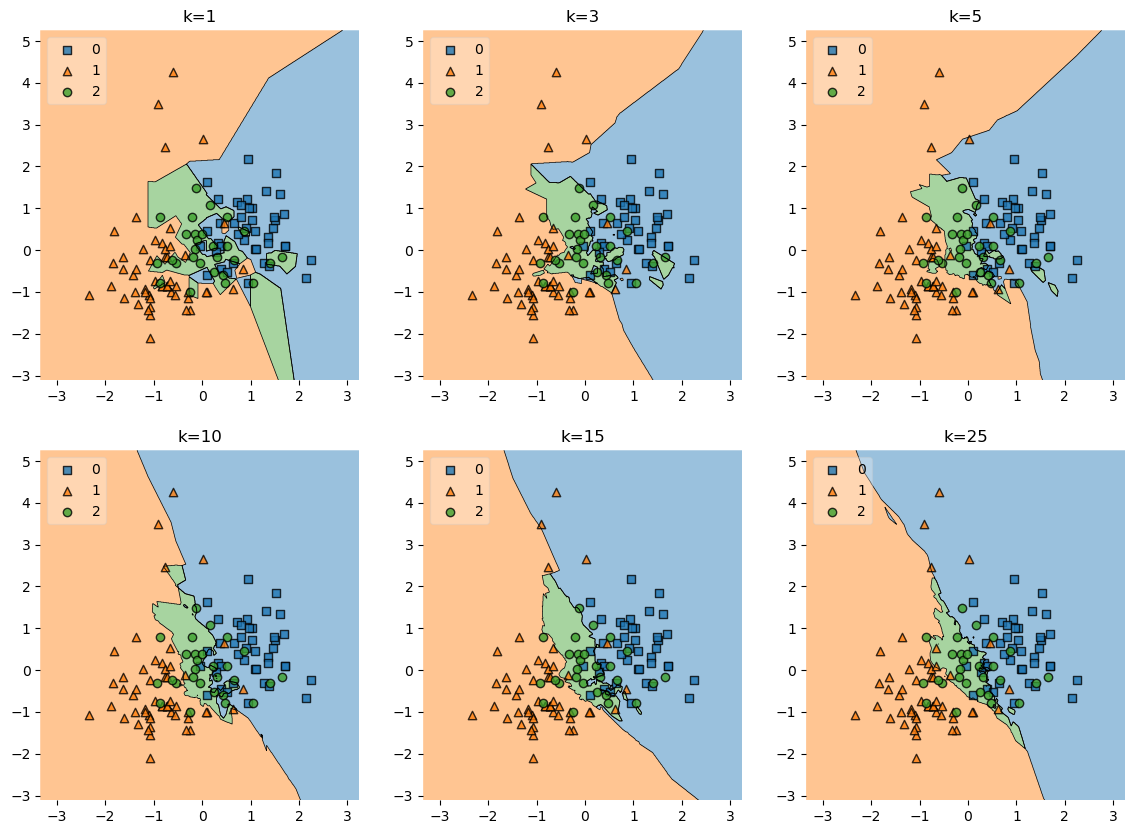

In [10]:
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(14,10))

labels = ['k=1', 'k=3', 'k=5', 'k=10', 'k=15', 'k=25']
for clf, lab, grd in zip(list_classifiers,
                         labels,
                         itertools.product(range(2), range(3))):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_train, y_train, clf, legend=2)
    plt.title(lab)

plt.show()


## **Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

1. Модель классификации с помощью алгоритма knn показала следующие результаты:
- k = 1; accuracy on test = 0.574
- k = 1; accuracy on train = 1.000
- k = 3; accuracy on test = 0.500
- k = 3; accuracy on train = 0.806
- k = 5; accuracy on test = 0.556
- k = 5; accuracy on train = 0.790
- k = 10; accuracy on test = 0.556
- k = 10; accuracy on train = 0.766
- k = 15; accuracy on test = 0.556
- k = 15; accuracy on train = 0.766
- k = 25; accuracy on test = 0.519
- k = 25; accuracy on train = 0.766

Для обучения классификатора оптимально использовать число соседей, равное 5, 10 или 15, так как при таких значениях модель показывает наибольшую точность. Среди этих троих значений числа соседей предпочтительно выбрать k=15, так как линии разграничения выглядят наиболее гладко, а ареалы классов выглядят наиболее целостно.

2. О переобучении явно свидетельствуют результаты модели при числе соседей равному 1, так как точность на тренировочной выборке равна 1. Это означает, что модель просто запоминает данные и подставляет правильные значения, ближайший 1 сосед для объекта - это сам объект. О переобучении также могут свидетельствовать результаты модели при числе соседей равному 3 или 5, так как на графиках видно несколько маленьких "островков", что свидетельствует о том, что модель чувствтиельна к шумам.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

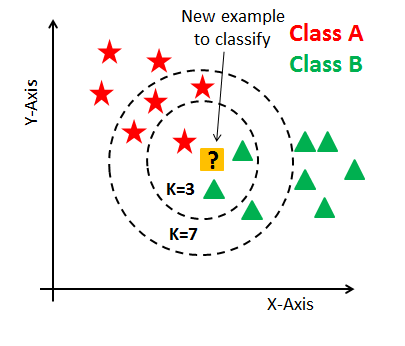

In [54]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = self.count_distances(x, self.X_train)
            sorted_indices = np.argsort(distances)
            k_nearest_indices = sorted_indices[:self.k]
            k_nearest_labels = self.y_train[k_nearest_indices]
            most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(most_common_label)
        return np.array(predictions)

    def count_distances(self, x, X):
        return np.sqrt(np.sum((X - x) ** 2, axis=1))


In [55]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [56]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [89]:
data = pd.read_csv(r'C:\Users\Huawei\Downloads\archive\diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [90]:
data = data.drop(columns = ['Unnamed: 0'])

data.isnull().sum()



carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [91]:
data.drop(columns = ['cut', 'color', 'clarity']).corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Больше всего с ценой бриллиантов коррелируют карат, длина, ширина и глубина

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [92]:
data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'])


In [93]:
X = data.drop(columns='price')
y = data['price']

In [94]:
data.corr()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.091844,0.034196,-0.163660,...,0.161494,0.180054,0.120983,-0.114449,0.062669,0.267483,-0.063094,-0.038904,-0.167571,-0.137024
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.280657,0.136114,-0.022778,...,0.022630,0.022543,0.081135,-0.030881,0.040899,0.007202,-0.024169,-0.009459,-0.023477,-0.019243
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.125332,0.175174,-0.549599,...,0.017967,0.037253,0.044716,-0.078766,0.051959,0.095344,-0.026858,-0.009655,-0.069103,-0.062273
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.018728,-0.000312,-0.097175,...,0.097125,0.081710,-0.000255,-0.049596,0.008957,0.128420,-0.009886,-0.001062,-0.095266,-0.052381
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.080644,0.030349,-0.162674,...,0.146522,0.164658,0.108361,-0.125976,0.079241,0.270827,-0.059882,-0.035507,-0.185253,-0.147151
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.068822,0.032187,-0.153158,...,0.142895,0.160776,0.100736,-0.120800,0.076097,0.263252,-0.056490,-0.035928,-0.179271,-0.141624
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.110367,0.045169,-0.158688,...,0.145276,0.164217,0.111913,-0.125248,0.081005,0.263192,-0.058513,-0.036314,-0.182401,-0.144746
cut_Fair,0.091844,0.280657,0.125332,0.018728,0.080644,0.068822,0.110367,1.000000,-0.055482,-0.143078,...,0.004770,0.017257,0.175852,-0.027022,0.004587,0.055506,-0.022453,-0.027266,-0.039920,-0.030703
cut_Good,0.034196,0.136114,0.175174,-0.000312,0.030349,0.032187,0.045169,-0.055482,1.000000,-0.258018,...,0.006187,0.014977,0.015844,-0.033046,0.055938,0.041970,-0.017116,-0.021063,-0.037564,-0.038627
cut_Ideal,-0.163660,-0.022778,-0.549599,-0.097175,-0.162674,-0.153158,-0.158688,-0.143078,-0.258018,1.000000,...,-0.009225,-0.038490,-0.048795,0.104986,-0.082865,-0.108242,0.034247,0.015669,0.088354,0.075508


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [152]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [153]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [154]:
lr = LinearRegression().fit(X_train, y_train)
print(f"Train: {mean_squared_error(y_train, lr.predict(X_train))}")
print(f"Test: {mean_squared_error(y_test, lr.predict(X_test))}")

Train: 1271379.7244977031
Test: 1289816.4038534916


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [155]:
coefficients = lr.coef_
coefficients

array([ 5.32629493e+03, -8.54231820e+01, -5.08308127e+01, -1.10816822e+03,
        1.80463117e+01, -6.04015442e+01, -1.25222472e+02, -4.52582139e+01,
        5.46777637e+01,  1.56950450e+01,  1.94326327e+00,  2.09409608e+02,
        1.55013009e+02,  1.33517079e+02,  5.92195811e+01, -1.24985043e+02,
       -2.48550136e+02, -3.89537717e+02, -4.80684789e+02,  2.33708172e+02,
       -1.48427291e+02, -4.90795689e+02,  2.06330271e+02,  1.10002681e+02,
        2.51242544e+02,  2.75667329e+02])

In [156]:
feature_names = X.columns  

for feature, coefficient in zip(feature_names, coefficients):
    print(f"Признак: {feature}, Коэффициент: {coefficient}")


Признак: carat, Коэффициент: 5326.294925129004
Признак: depth, Коэффициент: -85.42318198629725
Признак: table, Коэффициент: -50.830812701965534
Признак: x, Коэффициент: -1108.168217877972
Признак: y, Коэффициент: 18.04631167927336
Признак: z, Коэффициент: -60.40154420885787
Признак: cut_Fair, Коэффициент: -125.22247161253087
Признак: cut_Good, Коэффициент: -45.258213868319395
Признак: cut_Ideal, Коэффициент: 54.67776367499229
Признак: cut_Premium, Коэффициент: 15.695044965412432
Признак: cut_Very Good, Коэффициент: 1.9432632691743374
Признак: color_D, Коэффициент: 209.40960771019834
Признак: color_E, Коэффициент: 155.01300897717948
Признак: color_F, Коэффициент: 133.51707884442075
Признак: color_G, Коэффициент: 59.21958110625267
Признак: color_H, Коэффициент: -124.98504341336333
Признак: color_I, Коэффициент: -248.55013633792987
Признак: color_J, Коэффициент: -389.5377168980755
Признак: clarity_I1, Коэффициент: -480.68478929438106
Признак: clarity_IF, Коэффициент: 233.70817237810323
Пр

По значению коэффициента можно выделить следующие признаки: карат, длина.


**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [157]:
lasso = Lasso(10).fit(X_train, y_train)
print("Lasso")
print(f"Train: {mean_squared_error(y_train, lasso.predict(X_train))}")
print(f"Test: {mean_squared_error(y_test, lasso.predict(X_test))}")

ridge = Ridge(10).fit(X_train, y_train)
print("\nRidge")
print(f"Train: {mean_squared_error(y_train, ridge.predict(X_train))}")
print(f"Test: {mean_squared_error(y_test, ridge.predict(X_test))}")

Lasso
Train: 1282449.2750356267
Test: 1302296.2553415385

Ridge
Train: 1271447.6154546042
Test: 1290079.2460848005


In [158]:
coefficients_la = lasso.coef_

print('Коэффициенты для Lasso регрессии:')
for feature, coefficient in zip(feature_names, coefficients_la):
    print(f"Признак: {feature}, Коэффициент: {coefficient}")


Коэффициенты для Lasso регрессии:
Признак: carat, Коэффициент: 4862.367706254008
Признак: depth, Коэффициент: -51.47915872406234
Признак: table, Коэффициент: -37.93431564602768
Признак: x, Коэффициент: -625.0935668856156
Признак: y, Коэффициент: -0.0
Признак: z, Коэффициент: -83.01592878568248
Признак: cut_Fair, Коэффициент: -126.61086125939228
Признак: cut_Good, Коэффициент: -46.487231576519896
Признак: cut_Ideal, Коэффициент: 44.47418215063995
Признак: cut_Premium, Коэффициент: 0.0
Признак: cut_Very Good, Коэффициент: -0.0
Признак: color_D, Коэффициент: 143.25097912957366
Признак: color_E, Коэффициент: 82.39666712306865
Признак: color_F, Коэффициент: 59.914806936588406
Признак: color_G, Коэффициент: -0.0
Признак: color_H, Коэффициент: -169.1588154040377
Признак: color_I, Коэффициент: -278.9527698522286
Признак: color_J, Коэффициент: -405.6806977124621
Признак: clarity_I1, Коэффициент: -498.064566775885
Признак: clarity_IF, Коэффициент: 180.02317298002544
Признак: clarity_SI1, Коэффиц

In [159]:
coefficients_ri = ridge.coef_

print('Коэффициенты для ridge регрессии:')
for feature, coefficient in zip(feature_names, coefficients_ri):
    print(f"Признак: {feature}, Коэффициент: {coefficient}")


Коэффициенты для ridge регрессии:
Признак: carat, Коэффициент: 5288.386543031119
Признак: depth, Коэффициент: -81.55028938282024
Признак: table, Коэффициент: -50.54876053138325
Признак: x, Коэффициент: -1055.0787001393182
Признак: y, Коэффициент: 16.389121285112616
Признак: z, Коэффициент: -74.9970910731286
Признак: cut_Fair, Коэффициент: -125.41949711872127
Признак: cut_Good, Коэффициент: -45.36537728222742
Признак: cut_Ideal, Коэффициент: 54.686303705115726
Признак: cut_Premium, Коэффициент: 15.631182008384254
Признак: cut_Very Good, Коэффициент: 2.1544480834477304
Признак: color_D, Коэффициент: 209.16895672386883
Признак: color_E, Коэффициент: 154.78959474083382
Признак: color_F, Коэффициент: 133.0316069710698
Признак: color_G, Коэффициент: 58.958325912285716
Признак: color_H, Коэффициент: -124.7077191035625
Признак: color_I, Коэффициент: -247.9459084548101
Признак: color_J, Коэффициент: -388.7262039712404
Признак: clarity_I1, Коэффициент: -480.2017595873522
Признак: clarity_IF, Коэ

**Выводы**

При обучении модели Lasso регрессии значения некоторых коэффициентов уменьшились, но незначительно. Коэффициент при карате уменьшился на 10%, вместе с ним уменьшились коэффициенты длины и глубины, а коэф ширины и вовсе занулился. Так как эти признаки сильно коррелированы, то можно сказать, что такое изменение значений коэффициентов - и есть вклад регуляризации с помощью LASSO в преодолении эффекта от мультиколлинеарности.

В целом, можно  сказать, что в изначальной регрессии мультиколлинеарность проявила себя довольно слабо, так как сильно коррелированы были только 4 признака. Качество модели после регуляризации почти не изменилось. Возможно, следовало бы установить больший коэф регуляризации.


**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

C:\Users\Huawei\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.521e+08, tolerance: 5.980e+07
  model = cd_fast.enet_coordinate_descent(


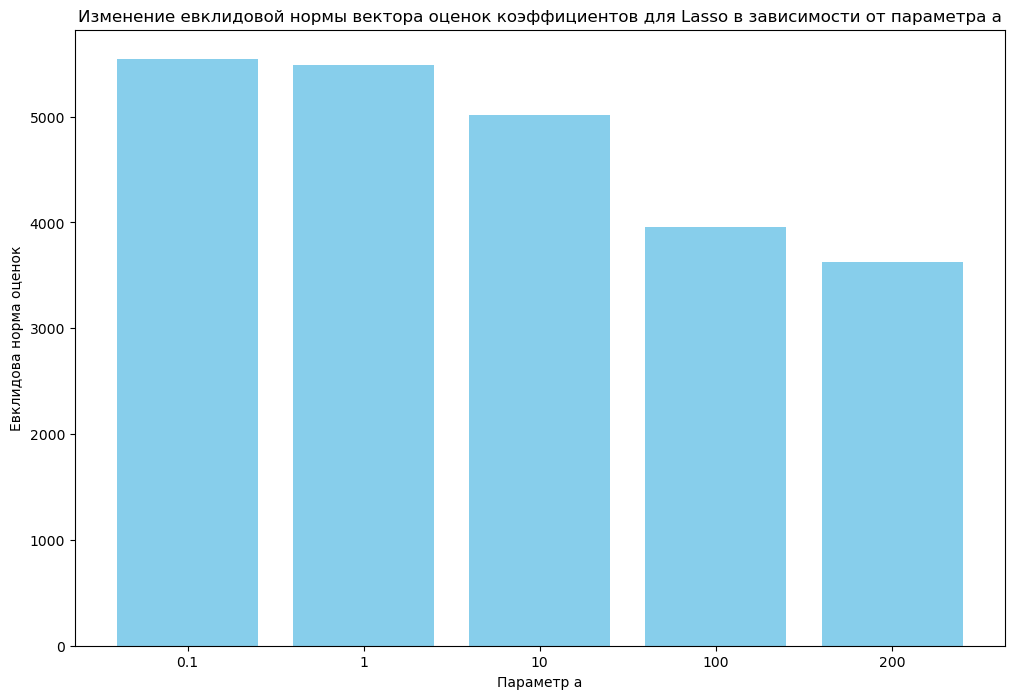

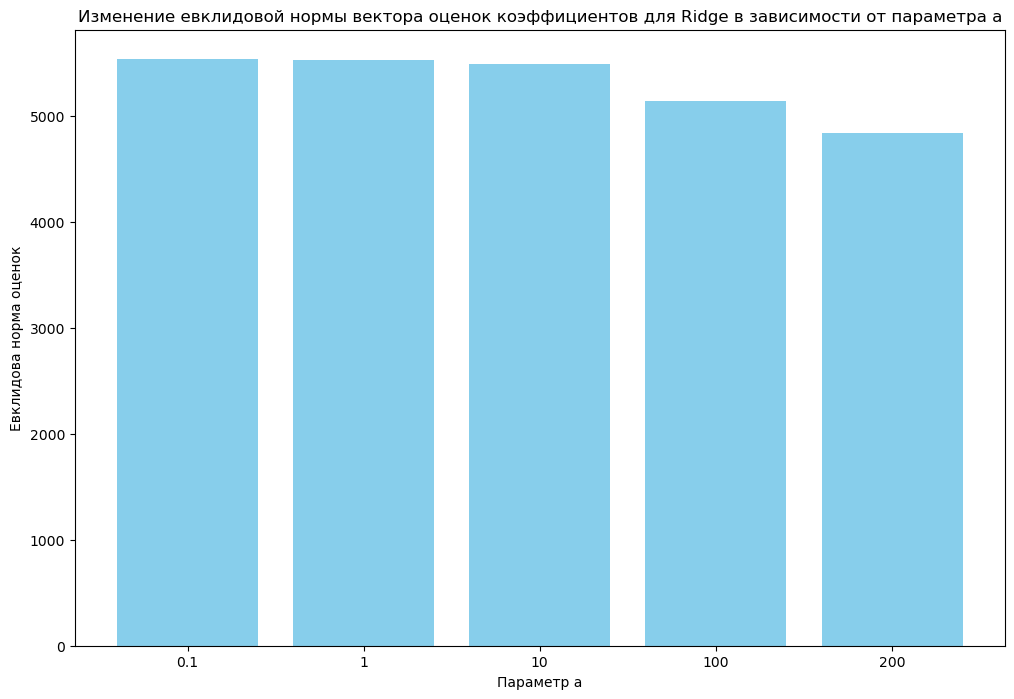

In [160]:
a_coefs = [0.1, 1, 10, 100, 200]
norms = []
norms_ri = []
for a in a_coefs:
    lasso = Lasso(a).fit(X_train, y_train)
    norm = np.linalg.norm(lasso.coef_)
    norms.append(norm)
    
    ridge = Ridge(a).fit(X_train, y_train)
    norm_ri = np.linalg.norm(ridge.coef_)
    norms_ri.append(norm_ri)

    
a_coefs = list(map(str, a_coefs))
plt.figure(figsize=(12, 8))
plt.bar(a_coefs, norms, color='skyblue')

plt.title('Изменение евклидовой нормы вектора оценок коэффициентов для Lasso в зависимости от параметра a')
plt.xlabel('Параметр a')
plt.ylabel('Евклидова норма оценок')

    
a_coefs = list(map(str, a_coefs))
plt.figure(figsize=(12, 8))
plt.bar(a_coefs, norms_ri, color='skyblue')

plt.title('Изменение евклидовой нормы вектора оценок коэффициентов для Ridge в зависимости от параметра a')
plt.xlabel('Параметр a')
plt.ylabel('Евклидова норма оценок')

plt.show()

Более резко уменьшает веса признаков Lasso-регрессия. Именно поэтому ее часто используют для отбора признаков: некоторые из них при высоких значениях а она зануляет.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [161]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, random_state=7, alphas = [0.1, 1, 10, 100, 200])
lasso_cv.fit(X_train, y_train)
print(lasso_cv.alphas_)
np.argmin(np.mean(lasso_cv.mse_path_, axis=1))


[2.e+02 1.e+02 1.e+01 1.e+00 1.e-01]


3

Таким образом, наибольшее качество модель дает при а равной 10.

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [162]:
lasso_10 = Lasso(10).fit(X_train, y_train)
coefficients_10 = lasso_10.coef_

print('Коэффициенты для Lasso регрессии с а = 10:')
for feature, coefficient in zip(feature_names, coefficients_10):
    print(f"Признак: {feature}, Коэффициент: {coefficient}")

Коэффициенты для Lasso регрессии с а = 10:
Признак: carat, Коэффициент: 4862.367706254008
Признак: depth, Коэффициент: -51.47915872406234
Признак: table, Коэффициент: -37.93431564602768
Признак: x, Коэффициент: -625.0935668856156
Признак: y, Коэффициент: -0.0
Признак: z, Коэффициент: -83.01592878568248
Признак: cut_Fair, Коэффициент: -126.61086125939228
Признак: cut_Good, Коэффициент: -46.487231576519896
Признак: cut_Ideal, Коэффициент: 44.47418215063995
Признак: cut_Premium, Коэффициент: 0.0
Признак: cut_Very Good, Коэффициент: -0.0
Признак: color_D, Коэффициент: 143.25097912957366
Признак: color_E, Коэффициент: 82.39666712306865
Признак: color_F, Коэффициент: 59.914806936588406
Признак: color_G, Коэффициент: -0.0
Признак: color_H, Коэффициент: -169.1588154040377
Признак: color_I, Коэффициент: -278.9527698522286
Признак: color_J, Коэффициент: -405.6806977124621
Признак: clarity_I1, Коэффициент: -498.064566775885
Признак: clarity_IF, Коэффициент: 180.02317298002544
Признак: clarity_SI1

**Выводы**

Наиболее значительными оказались такие признаки, как: карат, длина, цвет J, чистота  SI2. Неинформативными оказались ширина, качество нарезки премиум, качество нарезки очень хорошее, цвет G, чистота VS2.

Такое высокое значение коэффициента карат показал по очень простой причине: чем больше бриллиант, тем выше его стоимость. Признаки, отражающие габариты бриллианта, оказались отрицательными, и здесь есь как техническое, так и содержательное объяснение:
1. Это следствие мультиколлинеарности, которая до конца преодолена не была
2. Возможно, наиболее высоко ценятя бриллианты, приближенные к сферической форме, а значит любое растяжение будет приводить к падению цены. Дело может быть и в аномалиях, MSE к ним чувствительно. 

Коэффициенты при дамми признаках нарезки показали 0 или низкие значения, так как, возможно, при покупке  рядовому клиенту сложно оценить качество нарезки => не будет влиять на цену. Соответственно, цвет и частота показали относительно высокие коэффициенты, так как эстетически являются более важными (и заметными) характеристиками для клиента.


**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [163]:
mean_squared_error(y_test, lasso_10.predict(X_test))

1302296.2553415385

In [164]:
mean_squared_error(y_test, lr.predict(X_test))

1289816.4038534916

Для одних сидов:

Чуть более высокую ошибку показала модель без регуляризации. Собственно, качество модели в Lasso-регрессии выше как раз из-за наличия регуляризации. С помощью нее мы избежали переобучения и частично решили проблему мультиколлинеарности.

Для други сидов:

Ошибка выше у модели с регуляризацией. Ну не знаю что сказать. Наверное предыдущий вывод не очень значим, раз так. Возможно разницы в результатах практически нет, так как угрожающей мультиколлинеарности в данном случае тоже нет.